# Maps

Drawing maps can be achieved by using the [cartopy](https://scitools.org.uk/cartopy/docs/latest/#) library, which can be used with matplotlib.


<div class='alert alert-danger'>
    <strong>Cartopy vs. Basemap</strong> The Cartopy library is planned to take over the <a href="https://matplotlib.org/basemap/index.html" target="_blank">basemap</a> one. Therefore, the latter should not be used anymore, except if the desired Basemap functionality is not yet integrated to cartopy.
</div>

## Install

Since it is not a standard library, it needs to be installed. It is best to do it using `conda`, since it needs external C libraries. To install it, type in a terminal:

`conda install cartopy`

## Map initialisation

Maps are initialized by using the `pyplot.axes` with a `projection` argument that defines the Coordinate Reference System, i.e. a projection system. The list of available projections can be found [here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html).

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

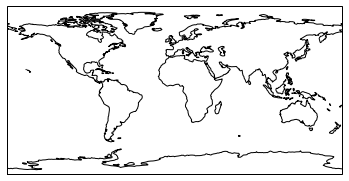

In [2]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()  # add coastlines
plt.show()

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

## Adding map features

In order to add features to the map (land color, ocean colors, etc.), use the [cartopy.feature](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html) interface.

Features should be added to the current axes by using the `add_feature` method.

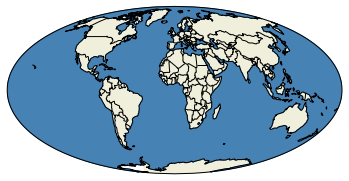

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection=ccrs.Mollweide())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN, color='SteelBlue')
plt.show()

It is also possible to use data from [naturalearthdata](https://www.naturalearthdata.com/) by using the 
`cartopy.feature.NaturalEarthFeature` interface:

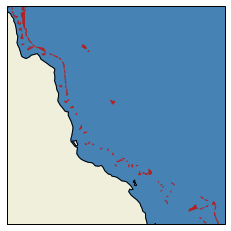

In [12]:
# Create a feature for reefs image
reefs = cfeature.NaturalEarthFeature(
    category='physical',
    name='reefs',
    scale='10m',
    edgecolor='face',
    facecolor='FireBrick'
)

# Download high resolution land and ocean features
l50m = cfeature.NaturalEarthFeature(
    'physical', 'land', '50m',
    edgecolor='face',
    facecolor=cfeature.COLORS['land'])

o50m = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '50m',
    edgecolor='face',
    facecolor='SteelBlue')

latc = -18 + 56/60.+ 15/(60 * 60)
lonc = 148 + 5/60 + 45/(60*60)

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xlim(lonc - 5, lonc + 5)
ax.set_ylim(latc - 5, latc + 5)
ax.add_feature(l50m)
ax.add_feature(o50m)
ax.add_feature(reefs)
ax.coastlines(resolution='50m')
plt.show()

## Plotting data

Examples on how to plot data using Cartopy are provided [here](https://scitools.org.uk/cartopy/docs/latest/matplotlib/advanced_plotting.html).

Basically, the same methods as in Matplotlib are used, except that a `transform` argument must be set equal to the projection used.

In [17]:
import scipy.io.netcdf as nc
import numpy as np

f = nc.netcdf_file('../io/data/UV500storm.nc', mmap=False)
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
u = f.variables['u'][0]
v = f.variables['v'][0]
u = np.ma.masked_where(np.abs(u) > 999, u)
v = np.ma.masked_where(np.abs(v) > 999, v)
vel = np.sqrt(u*u + v*v, where=(np.ma.getmaskarray(u) == False))

## Lines

In order to draw lines that follow geodetic distance, set the `transform` argument as equal to `ccrs.Geodetic()`.

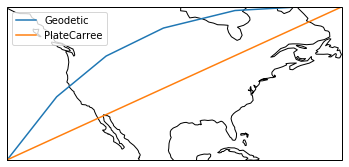

In [20]:
proj = ccrs.PlateCarree()
fig = plt.figure()
ax = plt.axes(projection=proj)
ax.set_xlim(lon.min(), lon.max())
ax.set_ylim(lat.min(), lat.max())
x = [lon.min(), lon.max()]
y = [lat.min(), lat.max()]
ax.plot(x, y, transform=ccrs.Geodetic(), label='Geodetic')
ax.plot(x, y, transform=ccrs.PlateCarree(), label='PlateCarree')
plt.legend()
ax.coastlines()  # add coastlines
plt.show()

### Contours

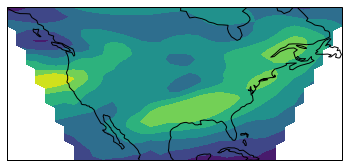

In [8]:
proj = ccrs.PlateCarree()
fig = plt.figure()
ax = plt.axes(projection=proj)
ax.set_xlim(lon.min(), lon.max())
ax.set_ylim(lat.min(), lat.max())
plt.contourf(lon, lat, u, transform=proj)
ax.coastlines()  # add coastlines
plt.show()

## Quivers

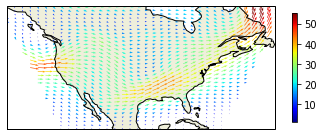

In [9]:
import matplotlib

proj = ccrs.PlateCarree()

fig = plt.figure()
ax = plt.axes(projection=proj)
ax.set_xlim(lon.min(), lon.max())
ax.set_ylim(lat.min(), lat.max())

cs = plt.quiver(lon, lat, u, v, vel, cmap=plt.cm.jet, transform=proj)
cb = plt.colorbar(cs, shrink=0.5)
cb.set_ticks(np.arange(0, 60, 10))

ax.coastlines()  # add coastlines
ax.add_feature(cfeature.LAND)
plt.show()

## Geodesic calculations

Geodesic calculations can be achieved using Cartopy (cf [geodesic](https://scitools.org.uk/cartopy/docs/latest/cartopy/geodesic.html)).